<a href="https://colab.research.google.com/github/GVSU-CIS635/gvsu-cis635-term-project-weather/blob/main/FinalDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grand Rapids Data:
         Date  Temperature_High  Temperature_Noon  Temperature_Low  Humidity  \
0  2022-12-01                36                33               26        66   
1  2022-12-02                51                45               32        58   
2  2022-12-03                50                29               22        72   
3  2022-12-04                38                35               21        69   
4  2022-12-05                42                39               26        64   
5  2022-12-06                42                41               36        79   
6  2022-12-07                46                44               31        85   
7  2022-12-08                37                35               29        80   
8  2022-12-09                34                32               28        83   
9  2022-12-10                34                33               32        86   
10 2022-12-11                38                37               32        93   
11 2022-12-12        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

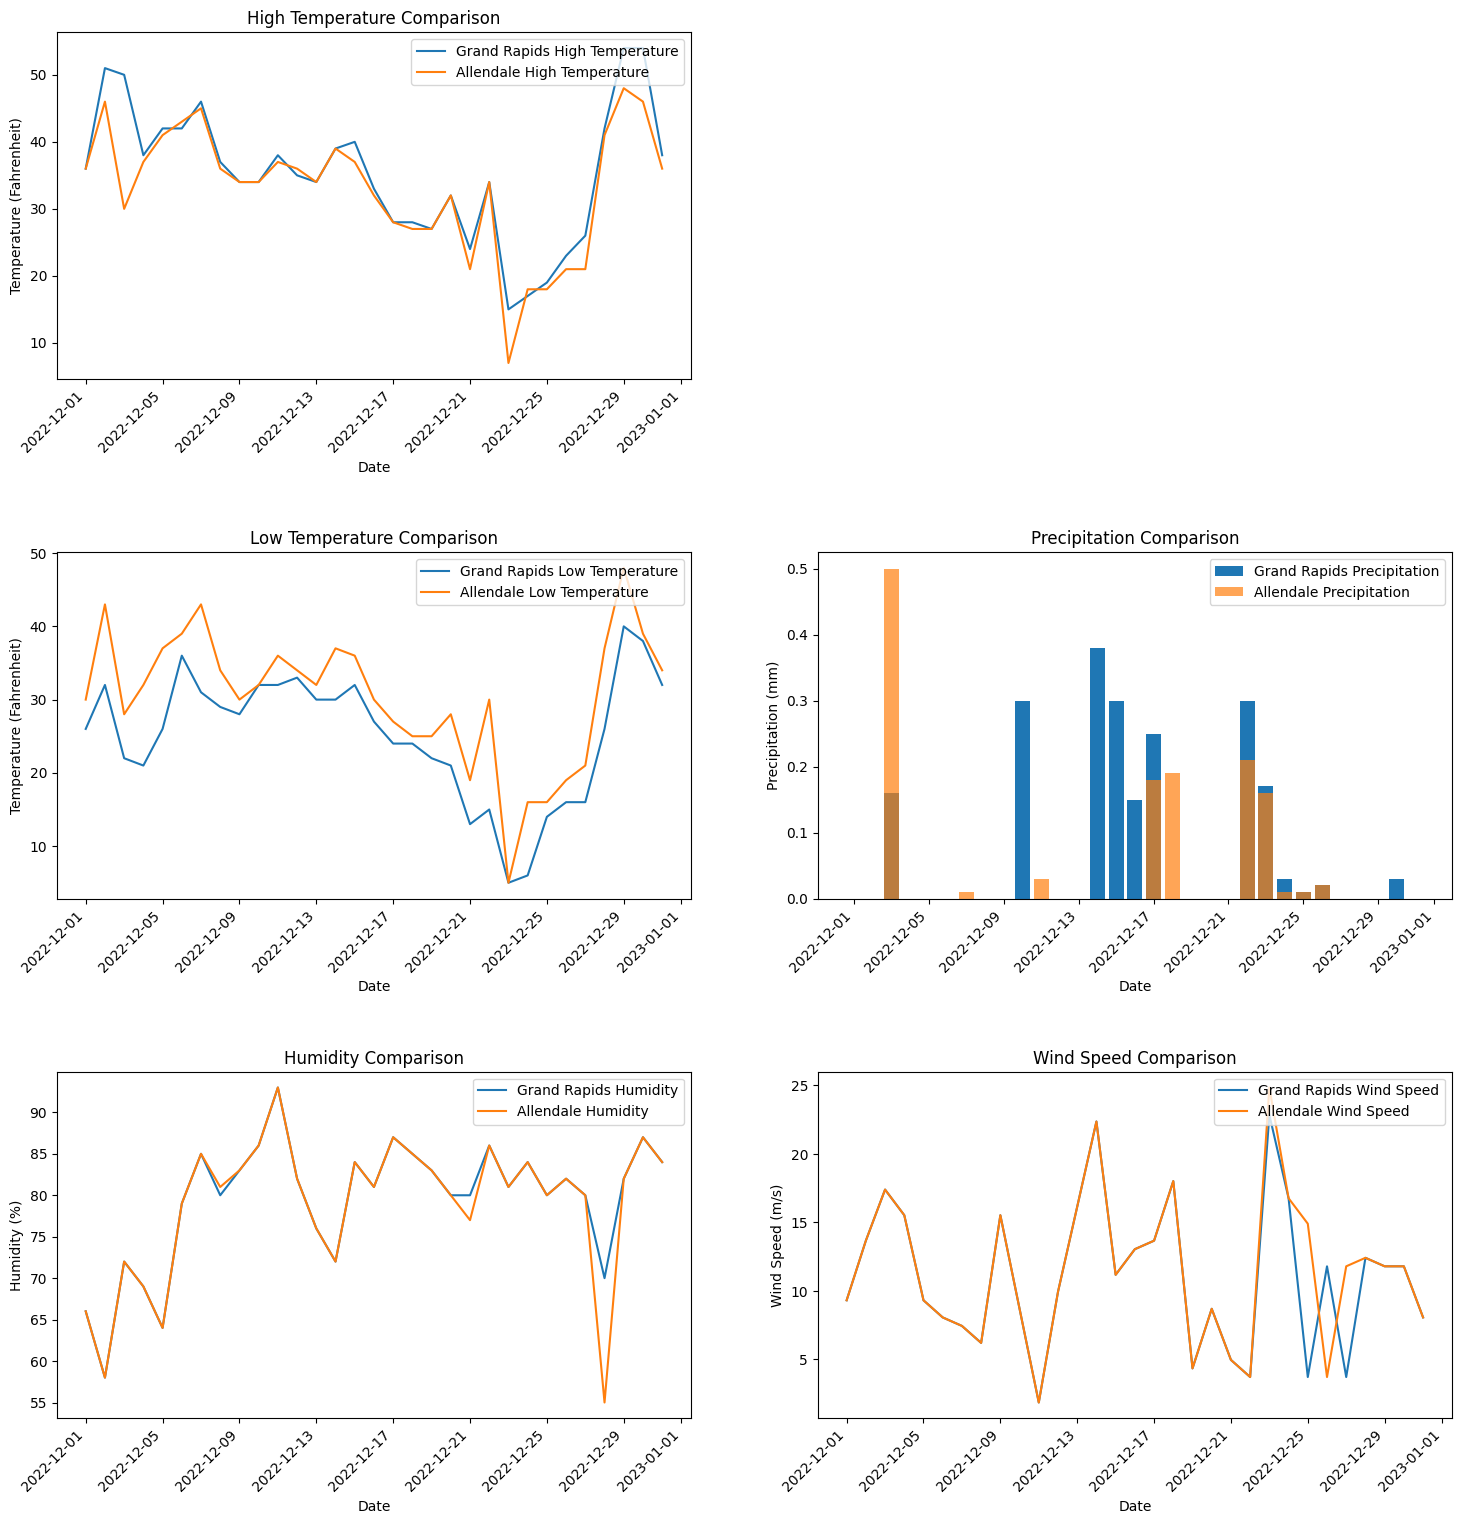

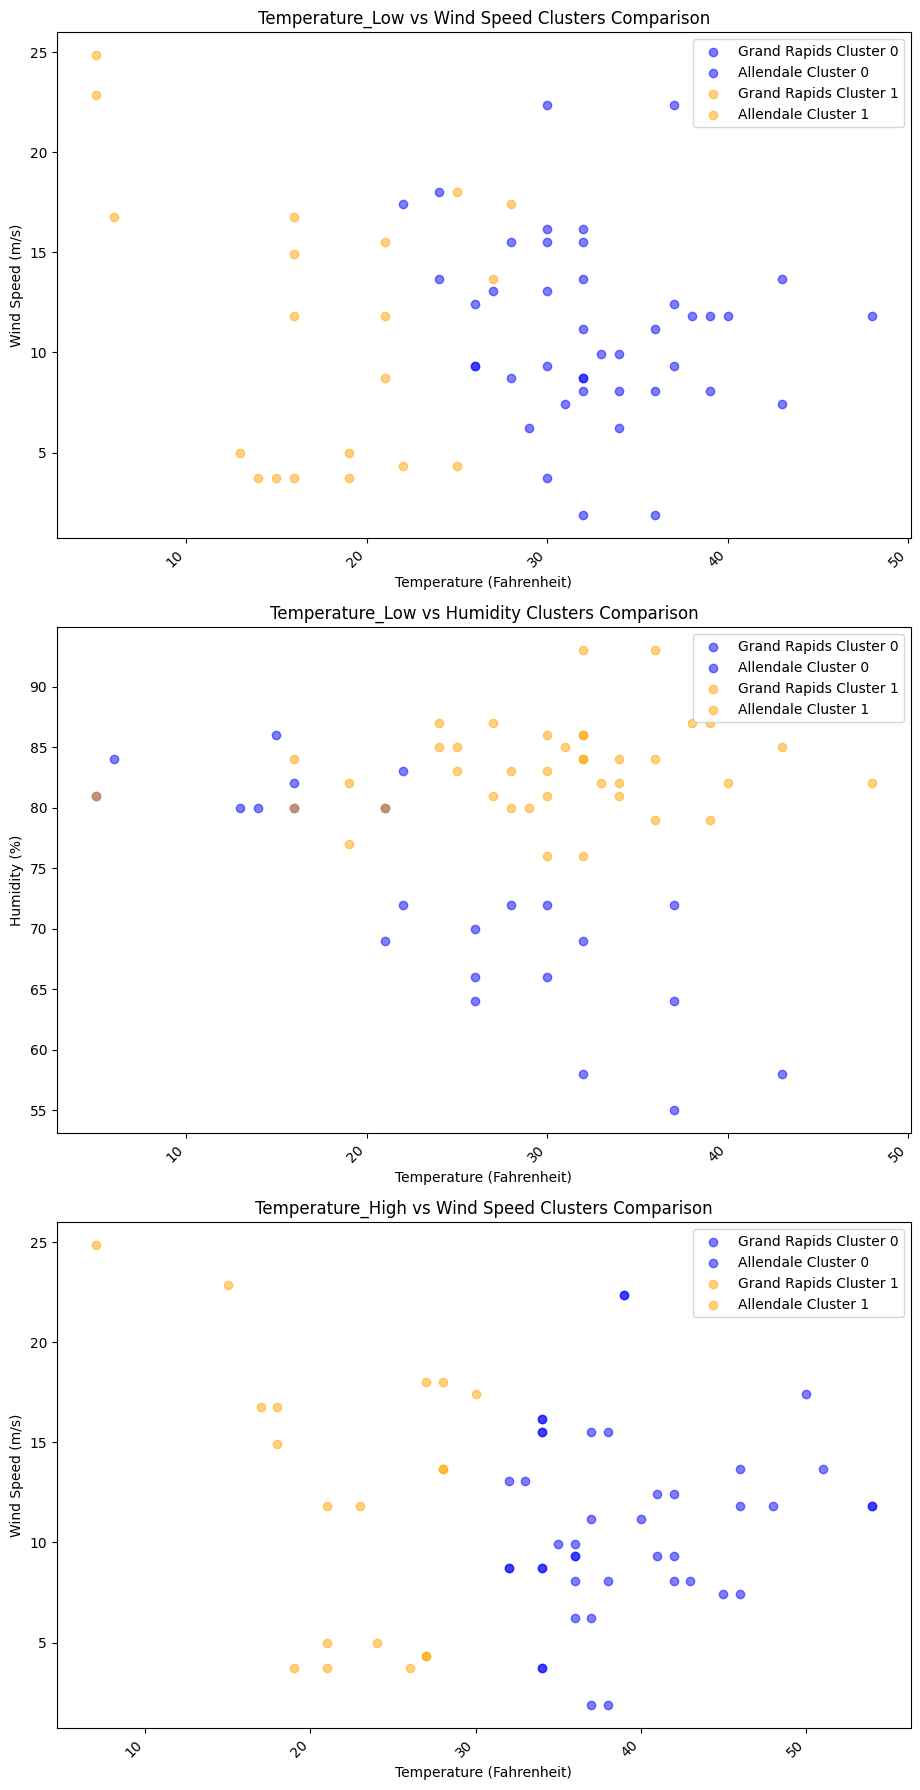


Temperature_High:

Grand Rapids:
Mean: 35.16
Standard Deviation: 10.08

Allendale:
Mean: 32.97
Standard Deviation: 9.53

Temperature_Noon:

Grand Rapids:
Mean: 31.77
Standard Deviation: 9.36

Allendale:
Mean: 31.77
Standard Deviation: 9.36

Temperature_Low:

Grand Rapids:
Mean: 25.13
Standard Deviation: 8.72

Allendale:
Mean: 30.39
Standard Deviation: 9.14


<ipython-input-34-6d5953ca14be>:262: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = gr_df.corr()


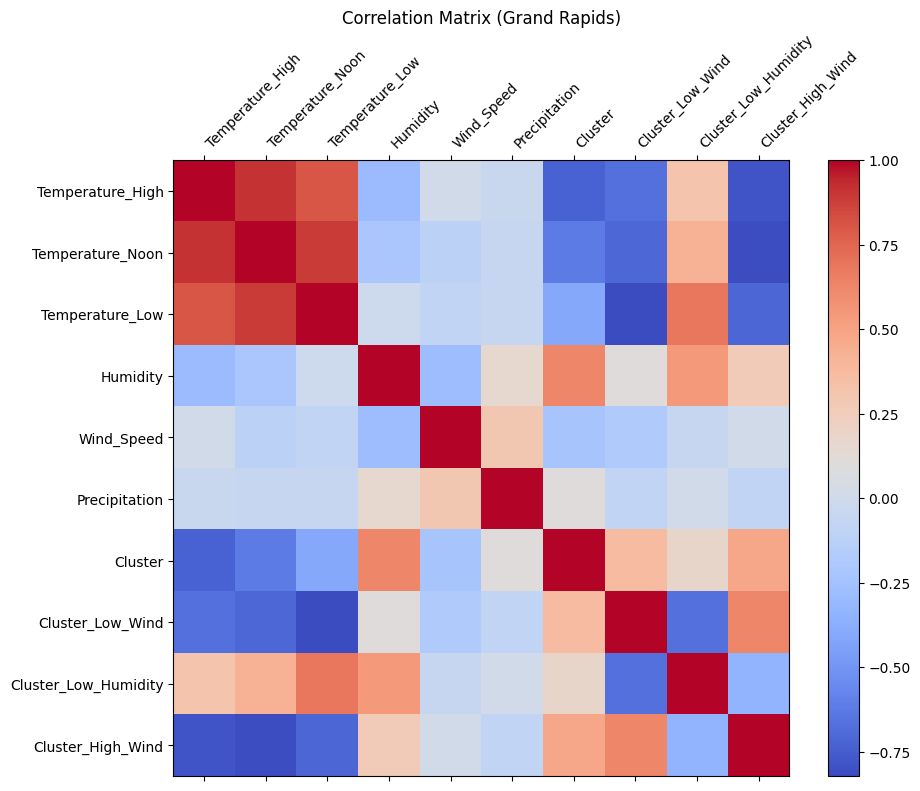

Correlation Matrix Grand Rapids:
                      Temperature_High  Temperature_Noon  Temperature_Low  \
Temperature_High              1.000000          0.914186         0.807455   
Temperature_Noon              0.914186          1.000000         0.890834   
Temperature_Low               0.807455          0.890834         1.000000   
Humidity                     -0.292314         -0.216330        -0.011255   
Wind_Speed                    0.003670         -0.114983        -0.086376   
Precipitation                -0.037687         -0.060798        -0.047866   
Cluster                      -0.729034         -0.618463        -0.405366   
Cluster_Low_Wind             -0.672334         -0.702385        -0.822805   
Cluster_Low_Humidity          0.309731          0.430251         0.685197   
Cluster_High_Wind            -0.784421         -0.809980        -0.713759   

                      Humidity  Wind_Speed  Precipitation   Cluster  \
Temperature_High     -0.292314    0.003670      

<ipython-input-34-6d5953ca14be>:285: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_adale = adale_df.corr()


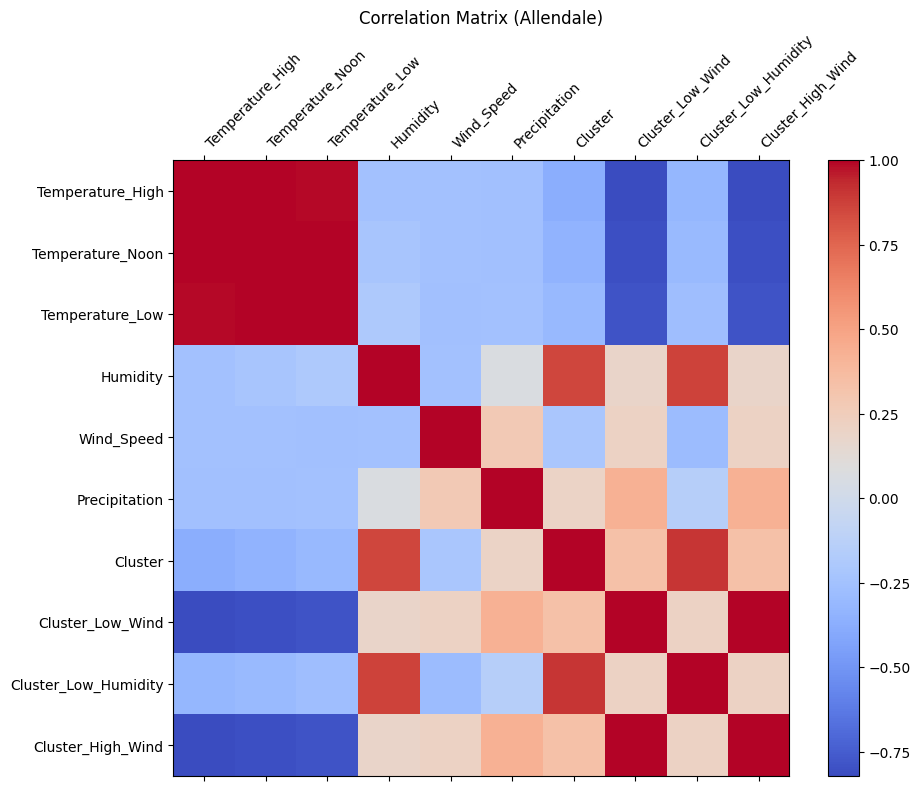

Correlation Matrix Allendale:
                      Temperature_High  Temperature_Noon  Temperature_Low  \
Temperature_High              1.000000          0.996640         0.986426   
Temperature_Noon              0.996640          1.000000         0.996132   
Temperature_Low               0.986426          0.996132         1.000000   
Humidity                     -0.246450         -0.219317        -0.194424   
Wind_Speed                   -0.249348         -0.251507        -0.254559   
Precipitation                -0.256961         -0.252962        -0.248739   
Cluster                      -0.367452         -0.340036        -0.305872   
Cluster_Low_Wind             -0.821970         -0.807283        -0.789640   
Cluster_Low_Humidity         -0.322788         -0.298064        -0.268535   
Cluster_High_Wind            -0.821970         -0.807283        -0.789640   

                      Humidity  Wind_Speed  Precipitation   Cluster  \
Temperature_High     -0.246450   -0.249348      -0.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.mixture import GaussianMixture

# Climate data
grand_rapids_data = [

    {'Date': '12-01-2022', 'Temperature_High': 36, 'Temperature_Noon': 33, 'Temperature_Low': 26,'Humidity': 66, 'Wind_Speed': 9.32, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-02-2022', 'Temperature_High': 51, 'Temperature_Noon': 45, 'Temperature_Low': 32,'Humidity': 58, 'Wind_Speed': 13.67, 'Wind_Direction': "S", 'Precipitation': 0},
    {'Date': '12-03-2022', 'Temperature_High': 50, 'Temperature_Noon': 29, 'Temperature_Low': 22,'Humidity': 72, 'Wind_Speed': 17.4, 'Wind_Direction': "WNW", 'Precipitation': 0.16},
    {'Date': '12-04-2022', 'Temperature_High': 38, 'Temperature_Noon': 35, 'Temperature_Low': 21,'Humidity': 69, 'Wind_Speed': 15.53, 'Wind_Direction': "WSW", 'Precipitation': 0},
    {'Date': '12-05-2022', 'Temperature_High': 42, 'Temperature_Noon': 39, 'Temperature_Low': 26,'Humidity': 64, 'Wind_Speed': 9.32, 'Wind_Direction': "SSW", 'Precipitation': 0},
    {'Date': '12-06-2022', 'Temperature_High': 42, 'Temperature_Noon': 41, 'Temperature_Low': 36,'Humidity': 79, 'Wind_Speed': 8.07, 'Wind_Direction': "E", 'Precipitation': 0},
    {'Date': '12-07-2022', 'Temperature_High': 46, 'Temperature_Noon': 44, 'Temperature_Low': 31,'Humidity': 85, 'Wind_Speed': 7.45, 'Wind_Direction': "W", 'Precipitation': 0},
    {'Date': '12-08-2022', 'Temperature_High': 37, 'Temperature_Noon': 35, 'Temperature_Low': 29,'Humidity': 80, 'Wind_Speed': 6.21, 'Wind_Direction': "ENE", 'Precipitation': 0},
    {'Date': '12-09-2022', 'Temperature_High': 34, 'Temperature_Noon': 32, 'Temperature_Low': 28,'Humidity': 83, 'Wind_Speed': 15.53, 'Wind_Direction': "ENE", 'Precipitation': 0},
    {'Date': '12-10-2022', 'Temperature_High': 34, 'Temperature_Noon': 33, 'Temperature_Low': 32,'Humidity': 86, 'Wind_Speed': 8.7, 'Wind_Direction': "E", 'Precipitation': 0.3},
    {'Date': '12-11-2022', 'Temperature_High': 38, 'Temperature_Noon': 37, 'Temperature_Low': 32,'Humidity': 93, 'Wind_Speed': 1.86, 'Wind_Direction': "NNE", 'Precipitation': 0},
    {'Date': '12-12-2022', 'Temperature_High': 35, 'Temperature_Noon': 35, 'Temperature_Low': 33,'Humidity': 82, 'Wind_Speed': 9.94, 'Wind_Direction': "E", 'Precipitation': 0},
    {'Date': '12-13-2022', 'Temperature_High': 34, 'Temperature_Noon': 33, 'Temperature_Low': 30,'Humidity': 76, 'Wind_Speed': 16.15, 'Wind_Direction': "E", 'Precipitation': 0},
    {'Date': '12-14-2022', 'Temperature_High': 39, 'Temperature_Noon': 38, 'Temperature_Low': 30,'Humidity': 72, 'Wind_Speed': 22.37, 'Wind_Direction': "E", 'Precipitation': 0.38},
    {'Date': '12-15-2022', 'Temperature_High': 40, 'Temperature_Noon': 37, 'Temperature_Low': 32,'Humidity': 84, 'Wind_Speed': 11.18, 'Wind_Direction': "SSW", 'Precipitation': 0.3},
    {'Date': '12-16-2022', 'Temperature_High': 33, 'Temperature_Noon': 31, 'Temperature_Low': 27,'Humidity': 81, 'Wind_Speed': 13.05, 'Wind_Direction': "S", 'Precipitation': 0.15},
    {'Date': '12-17-2022', 'Temperature_High': 28, 'Temperature_Noon': 28, 'Temperature_Low': 24,'Humidity': 87, 'Wind_Speed': 13.67, 'Wind_Direction': "SSW", 'Precipitation': 0.25},
    {'Date': '12-18-2022', 'Temperature_High': 28, 'Temperature_Noon': 26, 'Temperature_Low': 24,'Humidity': 85, 'Wind_Speed': 18.02, 'Wind_Direction': "WSW", 'Precipitation': 0},
    {'Date': '12-19-2022', 'Temperature_High': 27, 'Temperature_Noon': 26, 'Temperature_Low': 22,'Humidity': 83, 'Wind_Speed': 4.35, 'Wind_Direction': "NW", 'Precipitation': 0},
    {'Date': '12-20-2022', 'Temperature_High': 32, 'Temperature_Noon': 30, 'Temperature_Low': 21,'Humidity': 80, 'Wind_Speed': 8.7, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-21-2022', 'Temperature_High': 24, 'Temperature_Noon': 20, 'Temperature_Low': 13,'Humidity': 80, 'Wind_Speed': 4.97, 'Wind_Direction': "E", 'Precipitation': 0},
    {'Date': '12-22-2022', 'Temperature_High': 34, 'Temperature_Noon': 32, 'Temperature_Low': 15,'Humidity': 86, 'Wind_Speed': 3.72, 'Wind_Direction': "S", 'Precipitation': 0.3},
    {'Date': '12-23-2022', 'Temperature_High': 15, 'Temperature_Noon': 6, 'Temperature_Low': 5,'Humidity': 81, 'Wind_Speed': 22.85, 'Wind_Direction': "W", 'Precipitation': 0.17},
    {'Date': '12-24-2022', 'Temperature_High': 17, 'Temperature_Noon': 17, 'Temperature_Low': 6,'Humidity': 84, 'Wind_Speed': 16.77, 'Wind_Direction': "W", 'Precipitation': 0.03},
    {'Date': '12-25-2022', 'Temperature_High': 19, 'Temperature_Noon': 17, 'Temperature_Low': 14,'Humidity': 80, 'Wind_Speed': 3.72, 'Wind_Direction': "W", 'Precipitation': 0.01},
    {'Date': '12-26-2022', 'Temperature_High': 23, 'Temperature_Noon': 20, 'Temperature_Low': 16,'Humidity': 82, 'Wind_Speed': 11.8, 'Wind_Direction': "SSW", 'Precipitation': 0.02},
    {'Date': '12-27-2022', 'Temperature_High': 26, 'Temperature_Noon': 21, 'Temperature_Low': 16,'Humidity': 80, 'Wind_Speed': 3.72, 'Wind_Direction': "SSW", 'Precipitation': 0},
    {'Date': '12-28-2022', 'Temperature_High': 42, 'Temperature_Noon': 39, 'Temperature_Low': 26,'Humidity': 70, 'Wind_Speed': 12.42, 'Wind_Direction': "S", 'Precipitation': 0},
    {'Date': '12-29-2022', 'Temperature_High': 54, 'Temperature_Noon': 48, 'Temperature_Low': 40,'Humidity': 82, 'Wind_Speed': 11.8, 'Wind_Direction': "S", 'Precipitation': 0},
    {'Date': '12-30-2022', 'Temperature_High': 54, 'Temperature_Noon': 43, 'Temperature_Low': 38,'Humidity': 87, 'Wind_Speed': 11.8, 'Wind_Direction': "WSW", 'Precipitation': 0.03},
    {'Date': '12-31-2022', 'Temperature_High': 38, 'Temperature_Noon': 35, 'Temperature_Low': 32,'Humidity': 84, 'Wind_Speed': 8.07, 'Wind_Direction': "WNW", 'Precipitation': 0},
]
allendale_data = [
    {'Date': '12-01-2022', 'Temperature_High': 36, 'Temperature_Noon': 33, 'Temperature_Low': 30,'Humidity': 66, 'Wind_Speed': 9.32, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-02-2022', 'Temperature_High': 46, 'Temperature_Noon': 45, 'Temperature_Low': 43,'Humidity': 58, 'Wind_Speed': 13.67, 'Wind_Direction': "S", 'Precipitation': 0},
    {'Date': '12-03-2022', 'Temperature_High': 30, 'Temperature_Noon': 29, 'Temperature_Low': 28,'Humidity': 72, 'Wind_Speed': 17.4, 'Wind_Direction': "WNW", 'Precipitation': 0.5},
    {'Date': '12-04-2022', 'Temperature_High': 37, 'Temperature_Noon': 35, 'Temperature_Low': 32,'Humidity': 69, 'Wind_Speed': 15.53, 'Wind_Direction': "WSW", 'Precipitation': 0},
    {'Date': '12-05-2022', 'Temperature_High': 41, 'Temperature_Noon': 39, 'Temperature_Low': 37,'Humidity': 64, 'Wind_Speed': 9.32, 'Wind_Direction': "SSW", 'Precipitation': 0},
    {'Date': '12-06-2022', 'Temperature_High': 43, 'Temperature_Noon': 41, 'Temperature_Low': 39,'Humidity': 79, 'Wind_Speed': 8.07, 'Wind_Direction': "E", 'Precipitation': 0},
    {'Date': '12-07-2022', 'Temperature_High': 45, 'Temperature_Noon': 44, 'Temperature_Low': 43,'Humidity': 85, 'Wind_Speed': 7.45, 'Wind_Direction': "W", 'Precipitation': 0.01},
    {'Date': '12-08-2022', 'Temperature_High': 36, 'Temperature_Noon': 35, 'Temperature_Low': 34,'Humidity': 81, 'Wind_Speed': 6.21, 'Wind_Direction': "ENE", 'Precipitation': 0},
    {'Date': '12-09-2022', 'Temperature_High': 34, 'Temperature_Noon': 32, 'Temperature_Low': 30,'Humidity': 83, 'Wind_Speed': 15.53, 'Wind_Direction': "ENE", 'Precipitation': 0},
    {'Date': '12-10-2022', 'Temperature_High': 34, 'Temperature_Noon': 33, 'Temperature_Low': 32,'Humidity': 86, 'Wind_Speed': 8.7, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-11-2022', 'Temperature_High': 37, 'Temperature_Noon': 37, 'Temperature_Low': 36,'Humidity': 93, 'Wind_Speed': 1.86, 'Wind_Direction': "SW", 'Precipitation': 0.03},
    {'Date': '12-12-2022', 'Temperature_High': 36, 'Temperature_Noon': 35, 'Temperature_Low': 34,'Humidity': 82, 'Wind_Speed': 9.94, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-13-2022', 'Temperature_High': 34, 'Temperature_Noon': 33, 'Temperature_Low': 32,'Humidity': 76, 'Wind_Speed': 16.15, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-14-2022', 'Temperature_High': 39, 'Temperature_Noon': 38, 'Temperature_Low': 37,'Humidity': 72, 'Wind_Speed': 22.37, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-15-2022', 'Temperature_High': 37, 'Temperature_Noon': 37, 'Temperature_Low': 36,'Humidity': 84, 'Wind_Speed': 11.18, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-16-2022', 'Temperature_High': 32, 'Temperature_Noon': 31, 'Temperature_Low': 30,'Humidity': 81, 'Wind_Speed': 13.05, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-17-2022', 'Temperature_High': 28, 'Temperature_Noon': 28, 'Temperature_Low': 27,'Humidity': 87, 'Wind_Speed': 13.67, 'Wind_Direction': "SW", 'Precipitation': 0.18},
    {'Date': '12-18-2022', 'Temperature_High': 27, 'Temperature_Noon': 26, 'Temperature_Low': 25,'Humidity': 85, 'Wind_Speed': 18.02, 'Wind_Direction': "SW", 'Precipitation': 0.19},
    {'Date': '12-19-2022', 'Temperature_High': 27, 'Temperature_Noon': 26, 'Temperature_Low': 25,'Humidity': 83, 'Wind_Speed': 4.35, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-20-2022', 'Temperature_High': 32, 'Temperature_Noon': 30, 'Temperature_Low': 28,'Humidity': 80, 'Wind_Speed': 8.7, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-21-2022', 'Temperature_High': 21, 'Temperature_Noon': 20, 'Temperature_Low': 19,'Humidity': 77, 'Wind_Speed': 4.97, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-22-2022', 'Temperature_High': 34, 'Temperature_Noon': 32, 'Temperature_Low': 30,'Humidity': 86, 'Wind_Speed': 3.72, 'Wind_Direction': "SW", 'Precipitation': 0.21},
    {'Date': '12-23-2022', 'Temperature_High': 7, 'Temperature_Noon': 6, 'Temperature_Low': 5,'Humidity': 81, 'Wind_Speed': 24.85, 'Wind_Direction': "SW", 'Precipitation': 0.16},
    {'Date': '12-24-2022', 'Temperature_High': 18, 'Temperature_Noon': 17, 'Temperature_Low': 16,'Humidity': 84, 'Wind_Speed': 16.77, 'Wind_Direction': "SW", 'Precipitation': 0.01},
    {'Date': '12-25-2022', 'Temperature_High': 18, 'Temperature_Noon': 17, 'Temperature_Low': 16,'Humidity': 80, 'Wind_Speed': 14.91, 'Wind_Direction': "SW", 'Precipitation': 0.01},
    {'Date': '12-26-2022', 'Temperature_High': 21, 'Temperature_Noon': 20, 'Temperature_Low': 19,'Humidity': 82, 'Wind_Speed': 3.72, 'Wind_Direction': "SW", 'Precipitation': 0.02},
    {'Date': '12-27-2022', 'Temperature_High': 21, 'Temperature_Noon': 21, 'Temperature_Low': 21,'Humidity': 80, 'Wind_Speed': 11.8, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-28-2022', 'Temperature_High': 41, 'Temperature_Noon': 39, 'Temperature_Low': 37,'Humidity': 55, 'Wind_Speed': 12.42, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-29-2022', 'Temperature_High': 48, 'Temperature_Noon': 48, 'Temperature_Low': 48,'Humidity': 82, 'Wind_Speed': 11.8, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-30-2022', 'Temperature_High': 46, 'Temperature_Noon': 43, 'Temperature_Low': 39,'Humidity': 87, 'Wind_Speed': 11.8, 'Wind_Direction': "SW", 'Precipitation': 0},
    {'Date': '12-31-2022', 'Temperature_High': 36, 'Temperature_Noon': 35, 'Temperature_Low': 34,'Humidity': 84, 'Wind_Speed': 8.07, 'Wind_Direction': "SW", 'Precipitation': 0},
]


gr_df = pd.DataFrame(grand_rapids_data)
adale_df = pd.DataFrame(allendale_data)

# Convert 'Date' to datetime format
gr_df['Date'] = pd.to_datetime(gr_df['Date'])
adale_df['Date'] = pd.to_datetime(adale_df['Date'])


# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display all rows of each dataset
print("Grand Rapids Data:")
print(gr_df)

print("\nAllendale Data:")
print(adale_df)

# Reset pandas display options to default
pd.reset_option('display.max_rows')

# Data Exploration and Visualization
plt.figure(figsize=(18, 18))

# Plot high temperature for both cities
plt.subplot(3, 2, 1)
plt.plot(gr_df['Date'], gr_df['Temperature_High'], label='Grand Rapids High Temperature')
plt.plot(adale_df['Date'], adale_df['Temperature_High'], label='Allendale High Temperature')
plt.title('High Temperature Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')


# Plot low temperature for both cities
plt.subplot(3, 2, 3)
plt.plot(gr_df['Date'], gr_df['Temperature_Low'], label='Grand Rapids Low Temperature')
plt.plot(adale_df['Date'], adale_df['Temperature_Low'], label='Allendale Low Temperature')
plt.title('Low Temperature Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')

# Plot precipitation for both cities
plt.subplot(3, 2, 4)
plt.bar(gr_df['Date'], gr_df['Precipitation'], label='Grand Rapids Precipitation')
plt.bar(adale_df['Date'], adale_df['Precipitation'], label='Allendale Precipitation', alpha=0.7)
plt.title('Precipitation Comparison')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')

# Plot humidity for both cities
plt.subplot(3, 2, 5)
plt.plot(gr_df['Date'], gr_df['Humidity'], label='Grand Rapids Humidity')
plt.plot(adale_df['Date'], adale_df['Humidity'], label='Allendale Humidity')
plt.title('Humidity Comparison')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')

# Plot wind speed for both cities
plt.subplot(3, 2, 6)
plt.plot(gr_df['Date'], gr_df['Wind_Speed'], label='Grand Rapids Wind Speed')
plt.plot(adale_df['Date'], adale_df['Wind_Speed'], label='Allendale Wind Speed')
plt.title('Wind Speed Comparison')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(hspace=0.5)

# Run K-Means clustering on temperature and humidity columns for both cities
data_for_clustering_gr = gr_df[['Temperature_High', 'Humidity']].values
data_for_clustering_adale = adale_df[['Temperature_High', 'Humidity']].values
kmeans_gr = KMeans(n_clusters=2)
kmeans_adale = KMeans(n_clusters=2)

gr_df['Cluster'] = kmeans_gr.fit_predict(data_for_clustering_gr)
adale_df['Cluster'] = kmeans_adale.fit_predict(data_for_clustering_adale)

# Define colors for clusters
cluster_colors = {0: 'blue', 1: 'orange'}

# Run K-Means clustering on low and wind speed columns for both cities
data_for_clustering_low_wind_gr = gr_df[['Temperature_Low', 'Wind_Speed']].values
data_for_clustering_low_wind_adale = adale_df[['Temperature_Low', 'Wind_Speed']].values
kmeans_low_wind_gr = KMeans(n_clusters=2)
kmeans_low_wind_adale = KMeans(n_clusters=2)

gr_df['Cluster_Low_Wind'] = kmeans_low_wind_gr.fit_predict(data_for_clustering_low_wind_gr)
adale_df['Cluster_Low_Wind'] = kmeans_low_wind_adale.fit_predict(data_for_clustering_low_wind_adale)

# Run K-Means clustering on low and humidity columns for both cities
data_for_clustering_low_humidity_gr = gr_df[['Temperature_Low', 'Humidity']].values
data_for_clustering_low_humidity_adale = adale_df[['Temperature_Low', 'Humidity']].values
kmeans_low_humidity_gr = KMeans(n_clusters=2)
kmeans_low_humidity_adale = KMeans(n_clusters=2)

gr_df['Cluster_Low_Humidity'] = kmeans_low_humidity_gr.fit_predict(data_for_clustering_low_humidity_gr)
adale_df['Cluster_Low_Humidity'] = kmeans_low_humidity_adale.fit_predict(data_for_clustering_low_humidity_adale)

# Run K-Means clustering on high and wind speed columns for both cities
data_for_clustering_high_wind_gr = gr_df[['Temperature_High', 'Wind_Speed']].values
data_for_clustering_high_wind_adale = adale_df[['Temperature_High', 'Wind_Speed']].values
kmeans_high_wind_gr = KMeans(n_clusters=2)
kmeans_high_wind_adale = KMeans(n_clusters=2)

gr_df['Cluster_High_Wind'] = kmeans_high_wind_gr.fit_predict(data_for_clustering_high_wind_gr)
adale_df['Cluster_High_Wind'] = kmeans_high_wind_adale.fit_predict(data_for_clustering_high_wind_adale)

# Plot low vs wind speed clusters for both cities
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
for cluster, color in cluster_colors.items():
    plt.scatter(gr_df[gr_df['Cluster_Low_Wind'] == cluster]['Temperature_Low'], gr_df[gr_df['Cluster_Low_Wind'] == cluster]['Wind_Speed'], c=color, cmap='viridis', alpha=0.5, label=f'Grand Rapids Cluster {cluster}')
    plt.scatter(adale_df[adale_df['Cluster_Low_Wind'] == cluster]['Temperature_Low'], adale_df[adale_df['Cluster_Low_Wind'] == cluster]['Wind_Speed'], c=color, cmap='viridis', alpha=0.5, label=f'Allendale Cluster {cluster}')

plt.title('Temperature_Low vs Wind Speed Clusters Comparison')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Wind Speed (m/s)')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')

# Plot low vs humidity clusters for both cities
plt.subplot(3, 2, 3)
for cluster, color in cluster_colors.items():
    plt.scatter(gr_df[gr_df['Cluster_Low_Humidity'] == cluster]['Temperature_Low'], gr_df[gr_df['Cluster_Low_Humidity'] == cluster]['Humidity'], c=color, cmap='viridis', alpha=0.5, label=f'Grand Rapids Cluster {cluster}')
    plt.scatter(adale_df[adale_df['Cluster_Low_Humidity'] == cluster]['Temperature_Low'], adale_df[adale_df['Cluster_Low_Humidity'] == cluster]['Humidity'], c=color, cmap='viridis', alpha=0.5, label=f'Allendale Cluster {cluster}')

plt.title('Temperature_Low vs Humidity Clusters Comparison')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Humidity (%)')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')

# Plot high vs wind speed clusters for both cities
plt.subplot(3, 2, 5)
for cluster, color in cluster_colors.items():
    plt.scatter(gr_df[gr_df['Cluster_High_Wind'] == cluster]['Temperature_High'], gr_df[gr_df['Cluster_High_Wind'] == cluster]['Wind_Speed'], c=color, cmap='viridis', alpha=0.5, label=f'Grand Rapids Cluster {cluster}')
    plt.scatter(adale_df[adale_df['Cluster_High_Wind'] == cluster]['Temperature_High'], adale_df[adale_df['Cluster_High_Wind'] == cluster]['Wind_Speed'], c=color, cmap='viridis', alpha=0.5, label=f'Allendale Cluster {cluster}')

plt.title('Temperature_High vs Wind Speed Clusters Comparison')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Wind Speed (m/s)')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Function to calculate ROC accuracy and F1 accuracy
def calculate_metrics(true_labels, predicted_probs, threshold=0.5):
    predicted_labels = (predicted_probs >= threshold).astype(int)
    roc_accuracy = roc_auc_score(true_labels, predicted_probs)
    f1_accuracy = f1_score(true_labels, predicted_labels)
    return roc_accuracy, f1_accuracy

# Calculate mean and standard deviation for high, noon, and low temperatures for both cities
temperature_columns = ['Temperature_High', 'Temperature_Noon', 'Temperature_Low']

for column in temperature_columns:
    mean_gr = gr_df[column].mean()
    std_gr = gr_df[column].std()

    mean_adale = adale_df[column].mean()
    std_adale = adale_df[column].std()

    print(f"\n{column}:\n")
    print("Grand Rapids:")
    print(f"Mean: {mean_gr:.2f}")
    print(f"Standard Deviation: {std_gr:.2f}")

    print("\nAllendale:")
    print(f"Mean: {mean_adale:.2f}")
    print(f"Standard Deviation: {std_adale:.2f}")

correlation_matrix = gr_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

# Set labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='left')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Show the plot
plt.title('Correlation Matrix (Grand Rapids)')
plt.show()

print("Correlation Matrix Grand Rapids:")
print(correlation_matrix)

# Calculate correlation matrix for Allendale data
correlation_matrix_adale = adale_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
heat = ax.matshow(correlation_matrix_adale, cmap='coolwarm')

# Add colorbar
fig.colorbar(heat)

# Set labels
plt.xticks(range(len(correlation_matrix_adale.columns)), correlation_matrix_adale.columns, rotation=45, ha='left')
plt.yticks(range(len(correlation_matrix_adale.columns)), correlation_matrix_adale.columns)

# Show the plot
plt.title('Correlation Matrix (Allendale)')
plt.show()

print("Correlation Matrix Allendale:")
print(correlation_matrix_adale)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')